In [1]:
import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu))
tf.config.experimental.set_memory_growth(gpu[0], True)
from keras.datasets import mnist
from matplotlib import pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input
import numpy as np
from keras.applications.vgg16 import VGG16
from sklearn import datasets
from PIL import Image
import cv2
from keras import applications

Num GPUs Available:  1


In [2]:
#x_train, train_x_test = train_test_split(x_train, test_size=0.2, random_state=10, shuffle=True, stratify=None)

In [3]:
type(y_train)

numpy.ndarray

In [4]:
x_train = x_train.reshape((60000,28,28,1))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype('float32')/255

#x_val = x_train[-10000:]
#y_val = y_train[-10000:]
#x_train = x_train[:-10000]
#y_train = y_train[:-10000]

#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.2, random_state=42, shuffle=True, stratify=None)

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


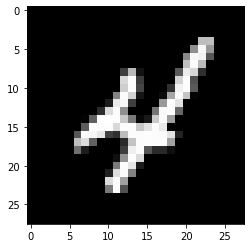

In [5]:
plt.imshow(x_train[9], cmap='gray')

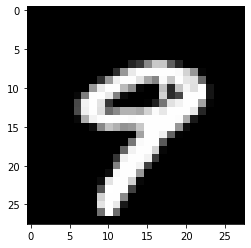

In [6]:
plt.imshow(x_test[9], cmap='gray')

In [7]:
#plt.imshow(x_val[9], cmap='gray')

In [8]:
#print(x_test.shape , x_train.shape, x_val.shape)

In [9]:
from keras import layers
from keras import models
def define_model():
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(28,28,1)))
    model.add(layers.Conv2D(32,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64,activation = 'relu'))
    model.add(layers.Dense(10, activation= 'softmax'))
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.layers[-3]

In [11]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [12]:
TBcallback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)

In [13]:
model.fit(x_train, y_train, epochs=10, batch_size = 2048, validation_split=0.2, callbacks = [TBcallback])

Epoch 1/10
24/24 [==============================] - 4s 39ms/step - loss: 1.2180 - accuracy: 0.6304 - val_loss: 0.4996 - val_accuracy: 0.8415
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.4366 - accuracy: 0.8651 - val_loss: 0.2670 - val_accuracy: 0.9230
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.2908 - accuracy: 0.9098 - val_loss: 0.2158 - val_accuracy: 0.9367
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.2170 - accuracy: 0.9339 - val_loss: 0.1477 - val_accuracy: 0.9586
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.1575 - accuracy: 0.9517 - val_loss: 0.1390 - val_accuracy: 0.9588
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.1361 - accuracy: 0.9578 - val_loss: 0.0925 - val_accuracy: 0.9736
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.1085 - accuracy: 0.9669 - val_loss: 0.0801 - val_accuracy: 0.9759
Epoch 8/10
24

In [14]:
x_test.shape

(10000, 28, 28, 1)

In [15]:

model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.9797


0.9797000288963318

In [16]:
layer = model.layers #Conv layers at 0, 2, 4
layer

In [17]:
filters, biases = model.layers[2].get_weights()
print(layer[2].name, filters.shape)

conv2d_1 (3, 3, 32, 64)


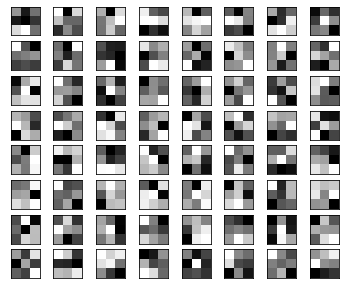

In [18]:
fig1=plt.figure(figsize=(6, 5))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 2], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

1/1 [==============================] - 0s 85ms/step


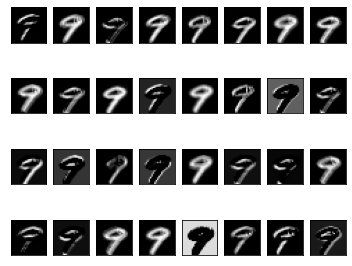

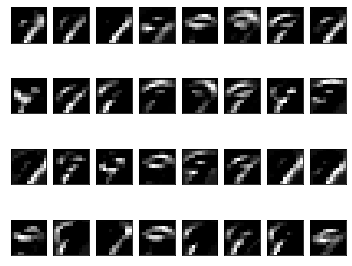

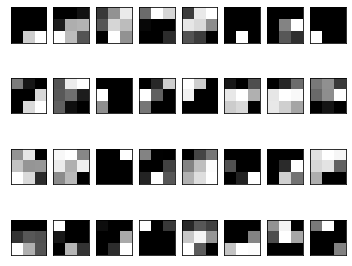

In [19]:
conv_layer_index = [0, 2, 4]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
#print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.utils import load_img
img = x_test[9] #VGG user 224 as input

# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)


columns = 8
rows = 4
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(6, 5))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

In [20]:
ftr.shape

(1, 3, 3, 64)

# Metodo 1: Upscaling

In [21]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

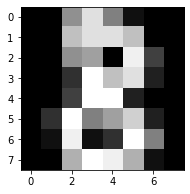

In [22]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[8], cmap='gray', interpolation="nearest")
plt.show()

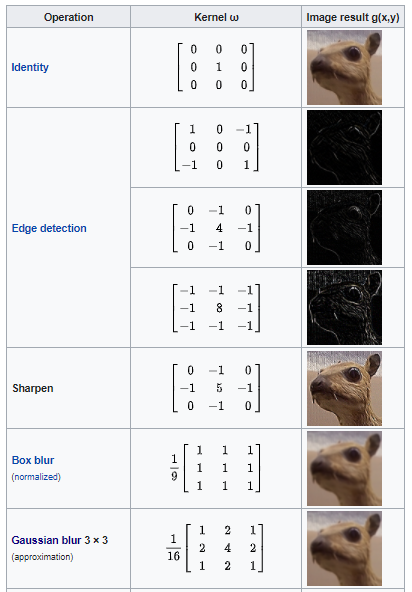

In [23]:
resized_img = [0 for i in range(1797)]
OGimg = digits.images
#resized_img = np.array(resized_img)
filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#filter2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
#sr = cv2.dnn_superres.DnnSuperResImpl_create()
#path = "EDSR_x4.pb"
#sr.readModel(path)
#sr.setModel("edsr",4)
for i in range(0,1797):
    resized_img[i] = cv2.resize(digits.images[i,:], (28, 28))
    resized_img[i] = cv2.filter2D(resized_img[i],-1,filter)
    #img = Image.fromarray(resized_img[i])
    #arr = sr.upsample(img)
    #resized_img[i] = np.array(arr)

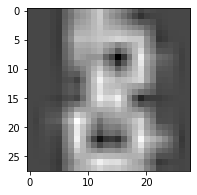

In [24]:
plt.figure(2, figsize=(3, 3))
plt.imshow(resized_img[8], cmap='gray', interpolation="nearest")
plt.show()

In [25]:
label = np.zeros((1797,10))
for i in range(0,1797):
    if(digits.target[i] == 0):
        label[i] = [1,0,0,0,0,0,0,0,0,0]
    elif(digits.target[i] == 1):
        label[i] = [0,1,0,0,0,0,0,0,0,0]
    elif(digits.target[i] == 2):
        label[i] = [0,0,1,0,0,0,0,0,0,0]
    elif(digits.target[i] == 3):
        label[i] = [0,0,0,1,0,0,0,0,0,0]
    elif(digits.target[i] == 4):
        label[i] = [0,0,0,0,1,0,0,0,0,0]
    elif(digits.target[i] == 5):
        label[i] = [0,0,0,0,0,1,0,0,0,0]
    elif(digits.target[i] == 6):
        label[i] = [0,0,0,0,0,0,1,0,0,0]
    elif(digits.target[i] == 7):
        label[i] = [0,0,0,0,0,0,0,1,0,0]
    elif(digits.target[i] == 8):
        label[i] = [0,0,0,0,0,0,0,0,1,0]
    elif(digits.target[i] == 9):
        label[i] = [0,0,0,0,0,0,0,0,0,1]
    
    

In [26]:
label = label.astype(int)

In [27]:
resized_img = np.array(resized_img)
resized_img = resized_img.reshape((1797,28,28,1))

In [28]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.evaluate(resized_img, label)

57/57 [==============================] - 0s 2ms/step - loss: 9.6912 - accuracy: 0.6850


[9.691241264343262, 0.6850305795669556]

# Metodo 2: Adaptar modelo

In [29]:
new_model = model
model.summary()
model.layers.pop()
model.layers.pop()
model.summary()
for layer in new_model.layers:
    layer.trainable = False
    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

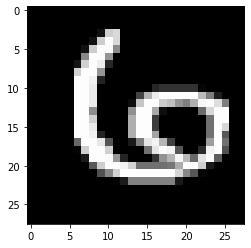

In [69]:
plt.imshow(x_test[54], cmap='gray')
y_test[54]

In [70]:
%%time
img = x_test[54]
img = (np.expand_dims(img,0))
model.predict(img)

1/1 [==============================] - 0s 15ms/step
CPU times: total: 31.2 ms
Wall time: 41.9 ms


array([[2.4747035e-06, 1.5911133e-06, 3.6283551e-10, 2.0457331e-07,
        3.1096679e-08, 6.3633641e-05, 9.9992990e-01, 1.5621362e-09,
        2.1554715e-06, 4.6268194e-09]], dtype=float32)